In [29]:
!pip install openflexure_microscope_client

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [30]:
import openflexure_microscope_client as ofm_client
import matplotlib.pyplot as plt
import numpy as np

In [31]:
microscope = ofm_client.MicroscopeClient("microscope")

In [32]:
pos = microscope.position
starting_pos = pos.copy()
pos['x'] += 100
microscope.move(pos)
assert microscope.position == pos
pos['x'] -= 100
microscope.move(pos)
assert microscope.position == starting_pos

# Check the microscope will autofocus
ret = microscope.autofocus()

#print(image.metadata)
print("Active microscope extensions")
for k in microscope.extensions.keys():
    print(k)

Active microscope extensions
org.openflexure.autofocus
org.openflexure.scan
org.openflexure.zipbuilder
org.openflexure.autostorage
org.openflexure.calibration.picamera
org.openflexure.camera_stage_mapping


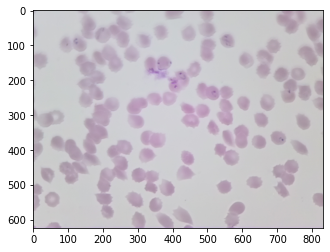

In [51]:
# Acquire an image for sanity-checking too
image = microscope.grab_image()
f, ax = plt.subplots(1,1)
ax.imshow(np.array(image))

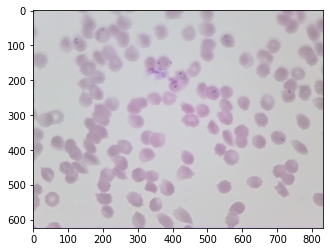

In [52]:
# Acquire an image for sanity-checking too
image = microscope.capture_image()
f, ax = plt.subplots(1,1)
ax.imshow(np.array(image))

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py", line 446, in _make_request
    assert_header_parsing(httplib_response.msg)
  File "/usr/local/lib/python3.6/dist-packages/urllib3/util/response.py", line 71, in assert_header_parsing
    raise HeaderParsingError(defects=defects, unparsed_data=unparsed_data)
urllib3.exceptions.HeaderParsingError: [StartBoundaryNotFoundDefect(), MultipartInvariantViolationDefect()], unparsed data: ''


6

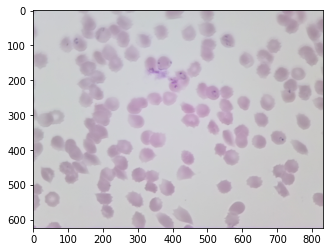

In [53]:
# Streaming
b = microscope.grab_mjpeg(2)
frames_found = 0
for image in ofm_client.iterate_mjpeg_images(b):
    plt.imshow(image)
    frames_found += 1
assert frames_found > 0
frames_found

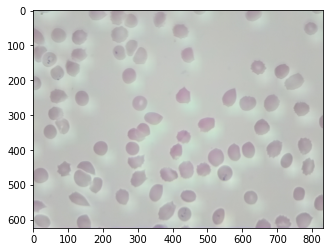

In [36]:
image = microscope.grab_image_array()
f, ax = plt.subplots(1,1)
ax.imshow(np.array(image))

In [37]:
image.shape

(624, 832, 3)

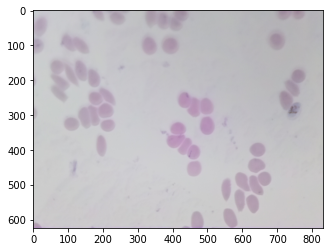

In [50]:
import PIL.Image
import io
microscope.autofocus()
r_content = microscope.grab_image_raw()
image = PIL.Image.open(io.BytesIO(r_content))
f, ax = plt.subplots(1,1)
ax.imshow(np.array(image))

In [45]:
x, y, z = microscope.get_position_array()
z

2371

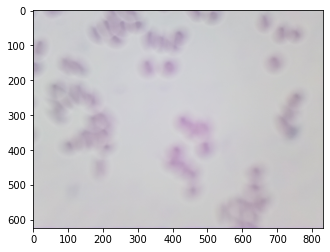

In [48]:
microscope.move([0,200,1688])
microscope.extensions["org.openflexure.autofocus"]["autofocus"].post_json()
image = microscope.grab_image_array()
f, ax = plt.subplots(1,1)
ax.imshow(np.array(image))

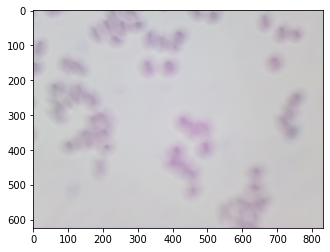

In [49]:
microscope.laplacian_autofocus({'autofocus_dz': 20})
image = microscope.grab_image_array()
f, ax = plt.subplots(1,1)
ax.imshow(np.array(image))